# Kelompok
**Muhammad Ismail - 5025201223**

**Mochamad Revanza Kurniawan - 5025201145**

**Muhammad Abhirama Damas - 5025201271**

#Pengenalan

1. Age
  - 13-level age category (_AGEG5YR see codebook) 1 = 18-24, 9 = 60-64, 13 = 80 or older

2. Sex
  - 0 = female, 1 = male

3. HighChol
  - 0 = no high cholesterol, 1 = high cholesterol

4. CholCheck
  - 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years

5. BMI
  - Body Mass Index

6.  Smoker
  - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no, 1 = yes

7. HeartDisease
  - coronary heart disease (CHD) or myocardial infarction (MI) 0 = no, 1 = yes

8. PhysActivity
  - physical activity in past 30 days - not including job 0 = no, 1 = yes

9. Fruits
  - Consume Fruit one or more times per day 0 = no, 1 = yes

10. Veggies
  - Consume Vegetables 1 or more times per day 0 = no, 1 = yes

11. HvyAlcoholConsumption
  - Adult male: more than 14 drinks per week. Adult female: more than 7 drinks per week. 0 = no, 1 = yes

12. GenHlth
  - Would you say that in general your health is: (scale 1-5) 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor

13. MentHlth
  - days of poor mental health scale 1-30 days
PhysHlth
physical illness or injury days in past 30 days scale 1-30

14. DiffWalk
  - Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes

15. Hypertension
- 0 = no hypertension, 1 = hypertension

# Import Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import graphviz 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
from google.colab import files
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import pickle
from imblearn.over_sampling import SMOTE

# Data Loading



In [2]:
df = pd.read_csv('/content/health_data.csv')
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning - Rev

In [3]:
df.info()
new_df = df.copy()
new_df.drop(columns=['Stroke','Diabetes','PhysActivity','HvyAlcoholConsump', 'Fruits', 'Veggies'], inplace=True)
new_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Diabetes           

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,GenHlth,MentHlth,PhysHlth,DiffWalk,Hypertension
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,2.837082,3.752037,5.810417,0.252730,0.563458
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,1.113565,8.155627,10.062261,0.434581,0.495960
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000


In [4]:
new_df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Hypertension            0
dtype: int64

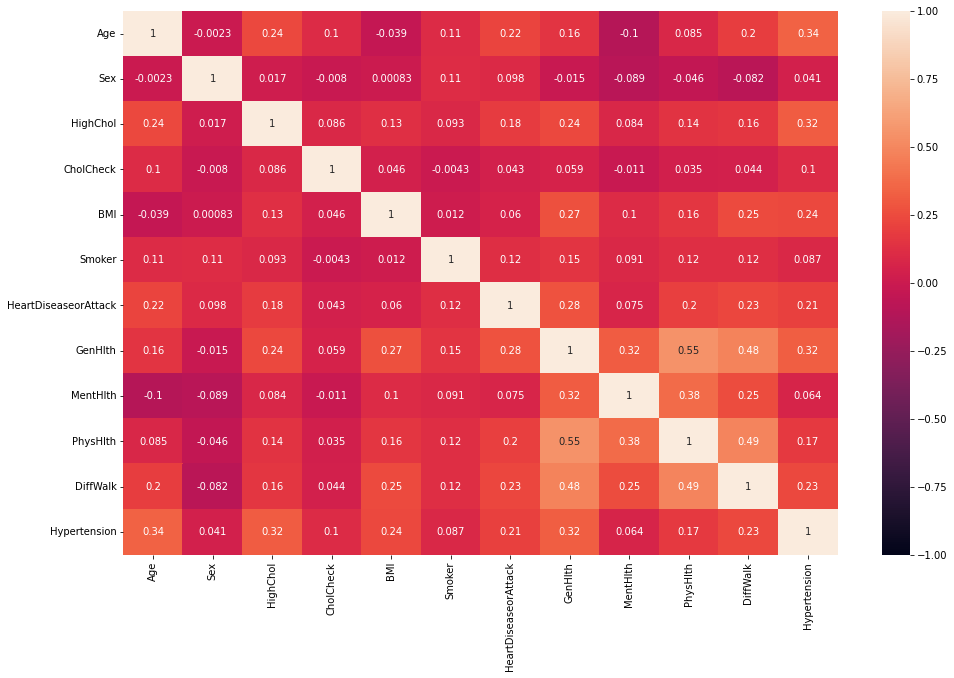

In [5]:
plt.figure(figsize=(16,10))
sns.heatmap(new_df.corr(), vmin=-1, vmax=1, annot=True)

# EDA - Mael

In [38]:
df_EDA = new_df.copy()

## Bar Plot

In [49]:
barplot_df = df_EDA[['Sex','HighChol','Smoker','HeartDiseaseorAttack']]
barplot_df.head()

,Sex,HighChol,Smoker,HeartDiseaseorAttack
0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [50]:
group_1 = barplot_df.groupby(['Sex']).sum()
group_1

,HighChol,Smoker,HeartDiseaseorAttack
Sex,,,
0.0,19875.0,16272.0,4447.0
1.0,17288.0,17326.0,6002.0


<Figure size 1440x1080 with 0 Axes>

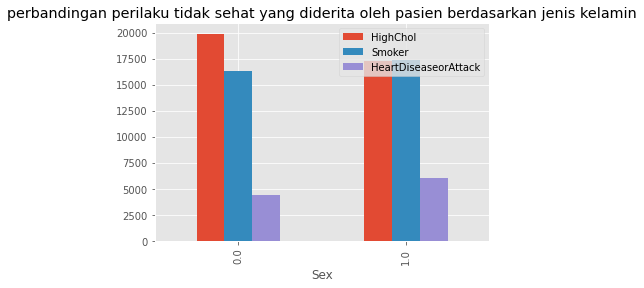

In [52]:
plt.figure(figsize=(20,15))
plt.style.use('ggplot')
group_1.plot(kind='bar',title='perbandingan perilaku tidak sehat yang diderita oleh pasien berdasarkan jenis kelamin')

Dari data tersebut, dapat didapatkan informasi bahwa perempuan cenderung mengonsumsi alkohol, sedangkan laki-laki cenderung merokok dan yang lebih banyak terkena penyakit jantung dibanding perempuan

## Histogram Plot

Text(0.5, 0, 'BMI')

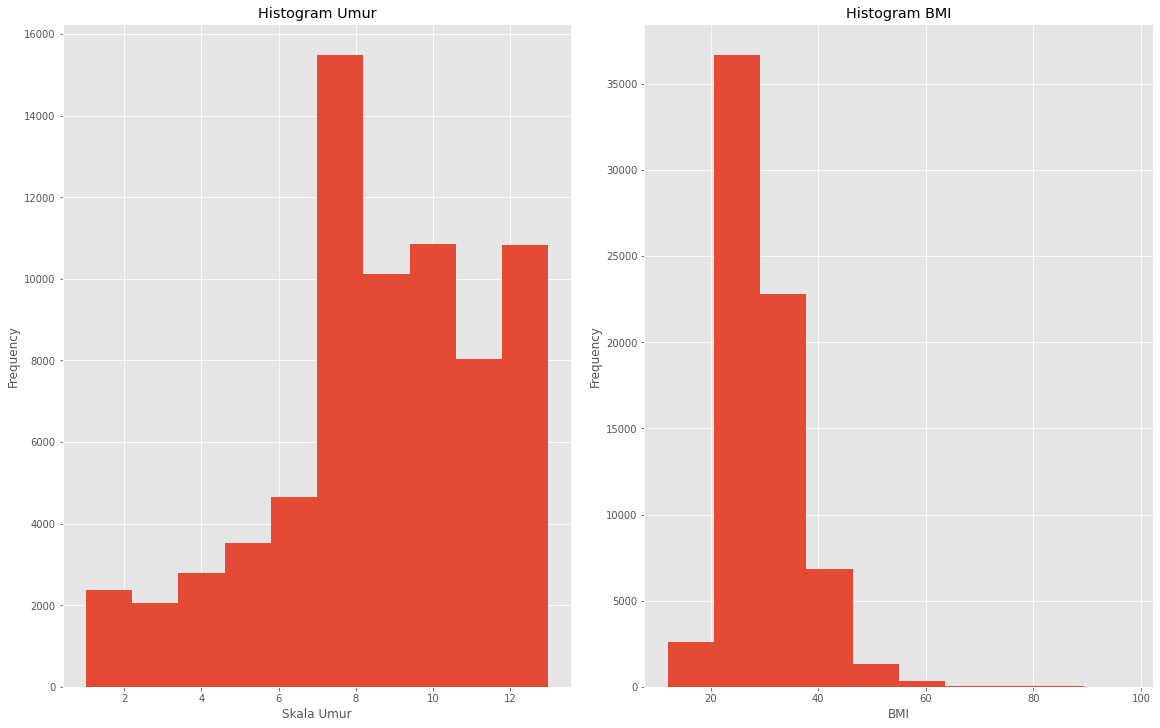

In [61]:
fig,ax = plt.subplots(1,2, figsize=(16,10), constrained_layout = True)
df_EDA['Age'].plot(kind='hist',ax=ax[0])
ax[0].set_xlabel('Skala Umur')
ax[0].set_title('Histogram Umur')
df_EDA['BMI'].plot(kind='hist',ax=ax[1])
ax[1].set_title('Histogram BMI')
ax[1].set_xlabel('BMI')

Dari Histogram di atas, didapatkan informasi bahwa Pasien Kebanyakan berada di Skala Umur lebih dari 7  yang berarti pasien berumur 50 tahun ke atas. Sedangkan BMI Pasien kebanyakan berada di kisaran 30-40 yang mana berarti pasien menderita overweight hingga obesitas

## Pier Chart

Text(0, 0.5, '')

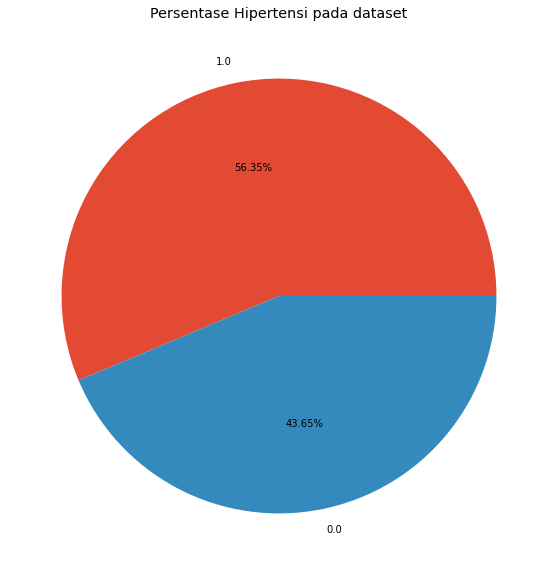

In [62]:
plt.figure(figsize=(16,10))

df_EDA['Hypertension'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    shadow=False
)
plt.title('Persentase Hipertensi pada dataset')
plt.ylabel('')

Dari Pie Chart di atas, didapatkan informasi bahwa pasien di dataset cenderung mengalami hipertensi

# Data Preprocessing - Damas

## Data Scaling

In [6]:
new_df_scaled = new_df.copy()
numerics = ['float64']
new_df_scaled.drop(columns=['Hypertension'], inplace=True)
scaler = StandardScaler()
numeric_df = new_df_scaled.select_dtypes(include=numerics)
for column in numeric_df.columns:
  new_df_scaled[column] = scaler.fit_transform(new_df_scaled[column].values.reshape(-1,1))
new_df_scaled['Hypertension'] = new_df['Hypertension']

In [7]:
new_df_scaled

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,GenHlth,MentHlth,PhysHlth,DiffWalk,Hypertension
0,-1.607237,1.090046,-1.052798,0.159276,-0.542176,-0.951711,-0.416470,0.146304,0.153020,2.404008,-0.581554,1.0
1,1.197681,1.090046,0.949850,0.159276,-0.542176,1.050740,-0.416470,0.146304,-0.460058,-0.577451,-0.581554,1.0
2,1.548296,1.090046,-1.052798,0.159276,-0.542176,-0.951711,-0.416470,-1.649743,-0.460058,0.416369,-0.581554,0.0
3,0.847066,1.090046,0.949850,0.159276,-0.261036,1.050740,-0.416470,0.146304,-0.460058,-0.279305,-0.581554,1.0
4,-0.204778,-0.917392,-1.052798,0.159276,-0.120466,1.050740,-0.416470,-0.751719,-0.460058,-0.577451,-0.581554,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
70687,-0.906008,-0.917392,0.949850,0.159276,1.004092,-0.951711,-0.416470,1.044328,-0.460058,-0.577451,-0.581554,0.0
70688,0.496451,1.090046,0.949850,0.159276,-0.120466,1.050740,2.401131,-0.751719,-0.460058,-0.577451,1.719532,0.0
70689,1.548296,-0.917392,0.949850,0.159276,-0.682745,-0.951711,2.401131,1.942351,1.379176,-0.577451,1.719532,1.0
70690,0.847066,-0.917392,0.949850,0.159276,-1.666734,-0.951711,-0.416470,1.044328,-0.460058,-0.577451,1.719532,1.0


## Data Splitting

In [8]:
X = new_df_scaled.drop(columns=['Hypertension'])
y = new_df_scaled['Hypertension']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Pendefinisian Model - Mael

## Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'criterion': ["gini", "entropy", "log_loss"], 'splitter': ["best", "random"]}
]
forest_reg = DecisionTreeClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'splitter': ['best', 'random']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

In [68]:
dt_model = DecisionTreeClassifier(criterion='entropy', splitter='random')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [80]:
y_predict_dt = dt_model.predict(X_test)

In [81]:
dt_accuration = accuracy_score(y_predict_dt, y_test)
dt_accuration

0.6526166902404527

## Random Forest


In [ ]:
param_grid = [
 {'criterion': ["gini", "entropy", "log_loss"], 'n_estimators': [100, 200, 300]}
]
forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'n_estimators': [100, 200, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'n_estimators': 300}

In [71]:
rnd_clf = RandomForestClassifier(criterion = 'entropy', n_estimators = 300)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [72]:
y_predict_forest = rnd_clf.predict(X_test)

In [73]:
accuration_forest = accuracy_score(y_predict_forest, y_test)
accuration_forest

0.6984441301272984

## SVM

In [31]:
svm = SVC()

In [74]:
svm.fit(X_train, y_train)

SVC()

In [75]:
y_predict_svm = svm.predict(X_test)

In [76]:
dt_accuration_svm = accuracy_score(y_predict_svm, y_test)
dt_accuration_svm

0.733946251768034

## SVM With Bagging

In [33]:
bag_svc = BaggingClassifier(
            SVC(), 
            bootstrap=True, 
            n_jobs=-1
)
bag_svc.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), n_jobs=-1)

In [34]:
y_predict_bag_svc = bag_svc.predict(X_test)

In [35]:
accuration_bag_svc = accuracy_score(y_predict_bag_svc, y_test)
accuration_bag_svc

0.732956152758133

## Extra Tree Classifier

In [ ]:
param_grid = [
 {'criterion': ["gini", "entropy", "log_loss"], 'n_estimators': [100, 200, 300]}
]
extra_tree = ExtraTreesClassifier()
grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'n_estimators': [100, 200, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'n_estimators': 200}

In [77]:
extra_tree_clf = ExtraTreesClassifier(criterion = 'gini', n_estimators = 200)
extra_tree_clf.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=200)

In [78]:
y_predict_extra_tree = extra_tree_clf.predict(X_test)

In [79]:
accuration_extra_tree = accuracy_score(y_predict_extra_tree, y_test)
accuration_extra_tree

0.6925035360678925

## Logistic Regression

In [9]:
lgr_clf = LogisticRegression()
lgr_clf.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_predict_lgr = lgr_clf.predict(X_test)

In [11]:
accuration_lgr = accuracy_score(y_predict_lgr, y_test)
accuration_lgr

0.731966053748232

## Logistic Regression with Bagging


In [12]:
bag_lgr_clf = BaggingClassifier(
            LogisticRegression(), 
            bootstrap=True, 
            n_jobs=-1
)
bag_lgr_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_jobs=-1)

In [13]:
y_predict_bag_lgr = bag_lgr_clf.predict(X_test)

In [14]:
accuration_bag_lgr = accuracy_score(y_predict_bag_lgr, y_test)
accuration_bag_lgr

0.7322489391796323

## Adaboost Logistic Regression

In [27]:
ada_clf = AdaBoostClassifier(
 LogisticRegression(), n_estimators=200,
 algorithm="SAMME.R", learning_rate=0.2
 )
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.2,
                   n_estimators=200)

In [28]:
y_predict_ada_clf = ada_clf.predict(X_test)

In [87]:
accuration_ada_clf = accuracy_score(y_predict_ada_clf, y_test)
accuration_ada_clf

0.7304101838755304

## Voting Classifier

In [65]:
voting_clf = VotingClassifier(
 estimators=[('lgr', lgr_clf), ('rf', rnd_clf), ('svc', svm)],
 voting='hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lgr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=300)),
                             ('svc', SVC())])

In [66]:
y_predict_voting_clf = voting_clf.predict(X_test)

In [67]:
accuration_voting_clf = accuracy_score(y_predict_voting_clf, y_test)
accuration_voting_clf

0.7342291371994343

# Evaluasi Model -Mael

In [82]:
list_pred = [y_predict_dt,
             y_predict_forest,
             y_predict_svm,
             y_predict_bag_svc,
             y_predict_extra_tree,
             y_predict_lgr,
             y_predict_bag_lgr,
             y_predict_ada_clf,
             y_predict_voting_clf]

list_model = ['Decision Tree Classifier',
              'Random Forest Classifier',
              'SVM Classifier',
              'SVM Classifier With Bagging',
              'Extra Tree Classifier',
              'Logistic Regression',
              'Logistic Regression With Bagging',
              'Logistic Regression With AdaBoost',
              'Voting Classifier']

## F1 Score

In [83]:
for i in range(len(list_pred)):
  print('F1 score dari model {} adalah {}'.format(list_model[i], f1_score(y_test,list_pred[i])))
  print('============================================')

F1 score dari model Decision Tree Classifier adalah 0.6861742908254536
F1 score dari model Random Forest Classifier adalah 0.7401901048013648
F1 score dari model SVM Classifier adalah 0.7796649877005973
F1 score dari model SVM Classifier With Bagging adalah 0.7779868297271871
F1 score dari model Extra Tree Classifier adalah 0.7299378881987577
F1 score dari model Logistic Regression adalah 0.7728634783650966
F1 score dari model Logistic Regression With Bagging adalah 0.772776377385668
F1 score dari model Logistic Regression With AdaBoost adalah 0.7703614457831327
F1 score dari model Voting Classifier adalah 0.7774487741324174


## Recall Score

In [84]:
for i in range(len(list_pred)):
  print('Recall score dari model {} adalah {}'.format(list_model[i], recall_score(y_test,list_pred[i])))
  print('============================================')

Recall score dari model Decision Tree Classifier adalah 0.6782015660520333
Recall score dari model Random Forest Classifier adalah 0.7671129072998232
Recall score dari model SVM Classifier adalah 0.8406163172518313
Recall score dari model SVM Classifier With Bagging adalah 0.8355645364991159
Recall score dari model Extra Tree Classifier adalah 0.7421065925738823
Recall score dari model Logistic Regression adalah 0.8143470573377115
Recall score dari model Logistic Regression With Bagging adalah 0.8130841121495327
Recall score dari model Logistic Regression With AdaBoost adalah 0.8075271533215459
Recall score dari model Voting Classifier adalah 0.828997221520586


## Precision Score

In [85]:
for i in range(len(list_pred)):
  print('Precision score dari model {} adalah {}'.format(list_model[i], precision_score(y_test,list_pred[i])))
  print('============================================')

Precision score dari model Decision Tree Classifier adalah 0.6943366951124903
Precision score dari model Random Forest Classifier adalah 0.7150930068283494
Precision score dari model SVM Classifier adalah 0.7269550021843599
Precision score dari model SVM Classifier With Bagging adalah 0.7278327832783278
Precision score dari model Extra Tree Classifier adalah 0.7181618186262527
Precision score dari model Logistic Regression adalah 0.7354014598540146
Precision score dari model Logistic Regression With Bagging adalah 0.7362763037511436
Precision score dari model Logistic Regression With AdaBoost adalah 0.7364662520156646
Precision score dari model Voting Classifier adalah 0.731935771632471


## Classification Report

In [91]:
for i in range(len(list_pred)):
  print('=====================================================================')
  print('Classification report dari model {}'.format(list_model[i]))
  print('=====================================================================')
  print('{}'.format(classification_report(y_test,list_pred[i])))
  print('\n')

Classification report dari model Decision Tree Classifier
              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61      3111
         1.0       0.69      0.68      0.69      3959

    accuracy                           0.65      7070
   macro avg       0.65      0.65      0.65      7070
weighted avg       0.65      0.65      0.65      7070



Classification report dari model Random Forest Classifier
              precision    recall  f1-score   support

         0.0       0.67      0.61      0.64      3111
         1.0       0.72      0.77      0.74      3959

    accuracy                           0.70      7070
   macro avg       0.69      0.69      0.69      7070
weighted avg       0.70      0.70      0.70      7070



Classification report dari model SVM Classifier
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.66      3111
         1.0       0.73      0.84      0.78      3959

    accuracy  

## Confusion Matrix

### Decision Tree CM

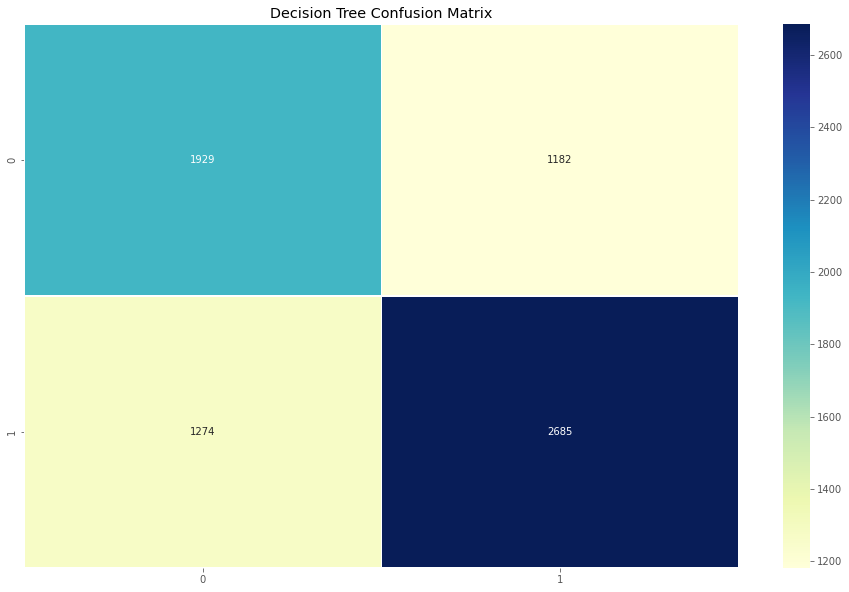

In [104]:
dtm = confusion_matrix(y_test, y_predict_dt)
plt.figure(figsize=(16,10))
plt.title('Decision Tree Confusion Matrix')
sns.heatmap(dtm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu')

### Random Forest CM

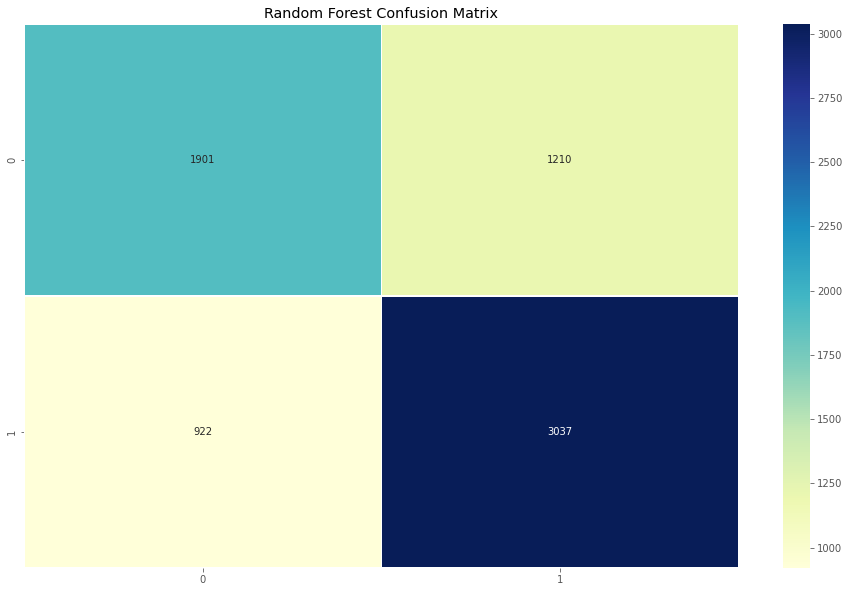

In [105]:
rfm = confusion_matrix(y_test, y_predict_forest)
plt.figure(figsize=(16,10))
plt.title('Random Forest Confusion Matrix')
sns.heatmap(rfm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu')

### SVM Classifier CM

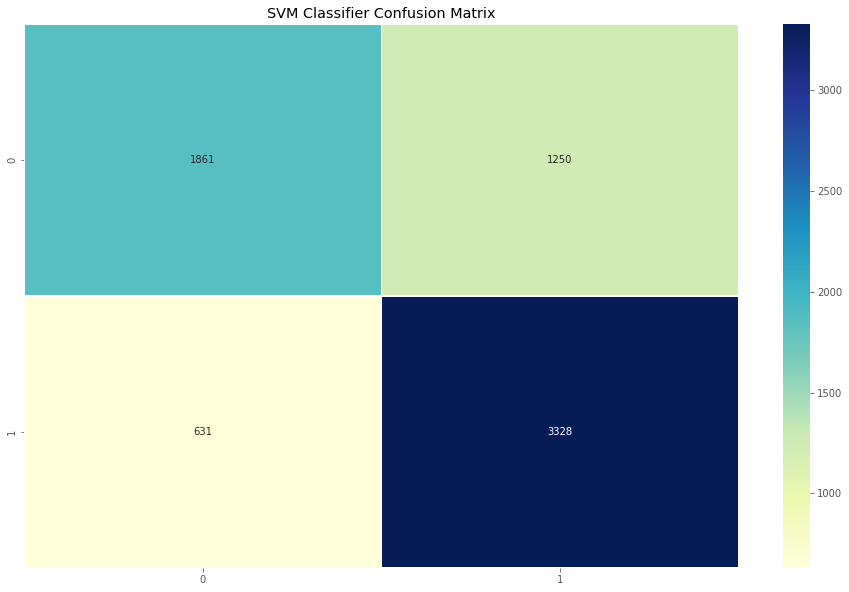

In [106]:
svmm = confusion_matrix(y_test, y_predict_svm)
plt.figure(figsize=(16,10))
plt.title('SVM Classifier Confusion Matrix')
sns.heatmap(svmm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu')

### SVM Classifier With Bagging CM

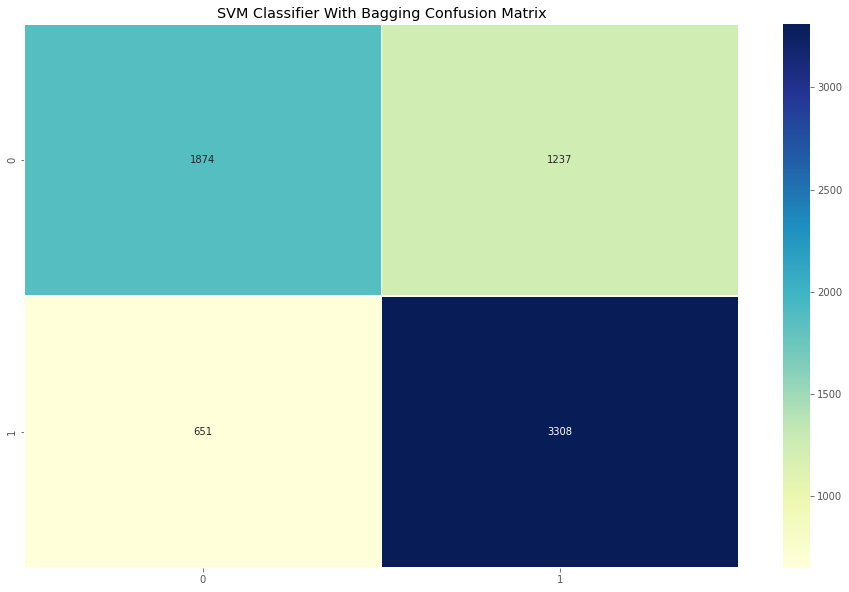

In [107]:
svmmb = confusion_matrix(y_test, y_predict_bag_svc)
plt.figure(figsize=(16,10))
plt.title('SVM Classifier With Bagging Confusion Matrix')
sns.heatmap(svmmb, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu')

### Extra Tree Classifier CM

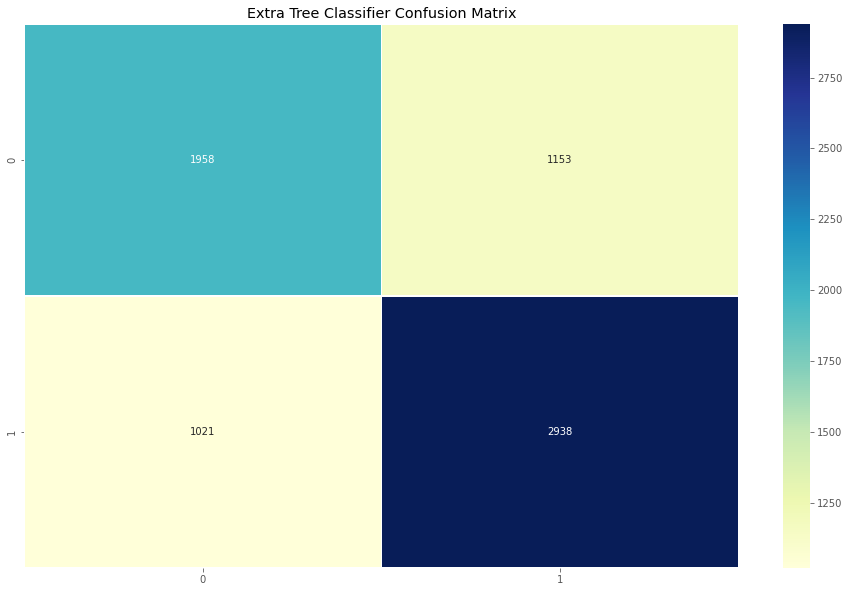

In [108]:
xtm = confusion_matrix(y_test, y_predict_extra_tree)
plt.figure(figsize=(16,10))
plt.title('Extra Tree Classifier Confusion Matrix')
sns.heatmap(xtm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu')

### Logistic Regression CM

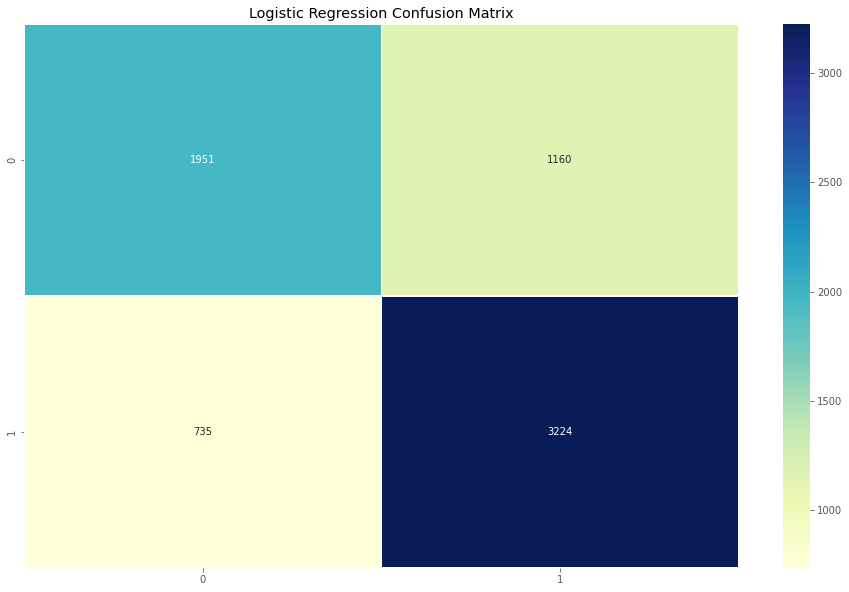

In [109]:
lgrm = confusion_matrix(y_test, y_predict_lgr)
plt.figure(figsize=(16,10))
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(lgrm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu')

### Logistic Regression With Bagging CM

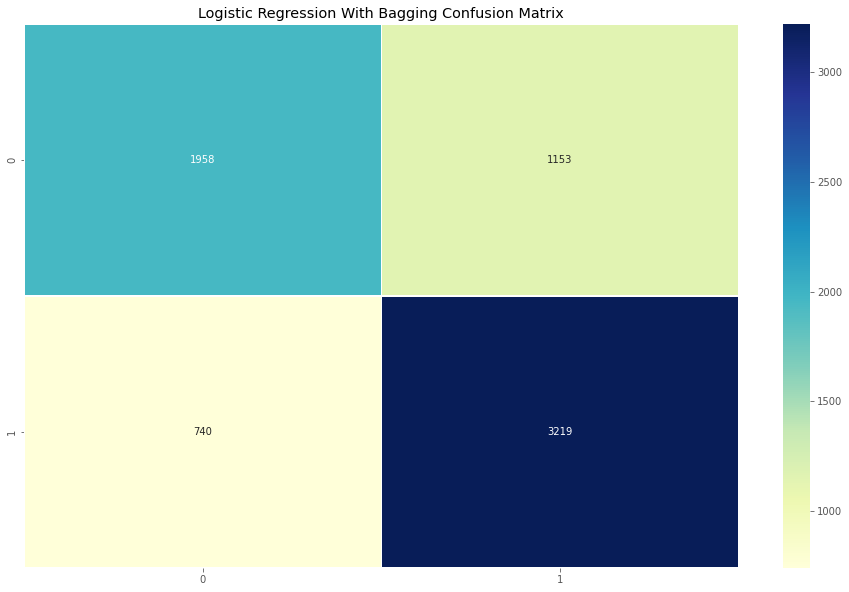

In [111]:
lgrmb = confusion_matrix(y_test, y_predict_bag_lgr)
plt.figure(figsize=(16,10))
plt.title('Logistic Regression With Bagging Confusion Matrix')
sns.heatmap(lgrmb, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu')

### Logistic Regression With AdaBoost CM

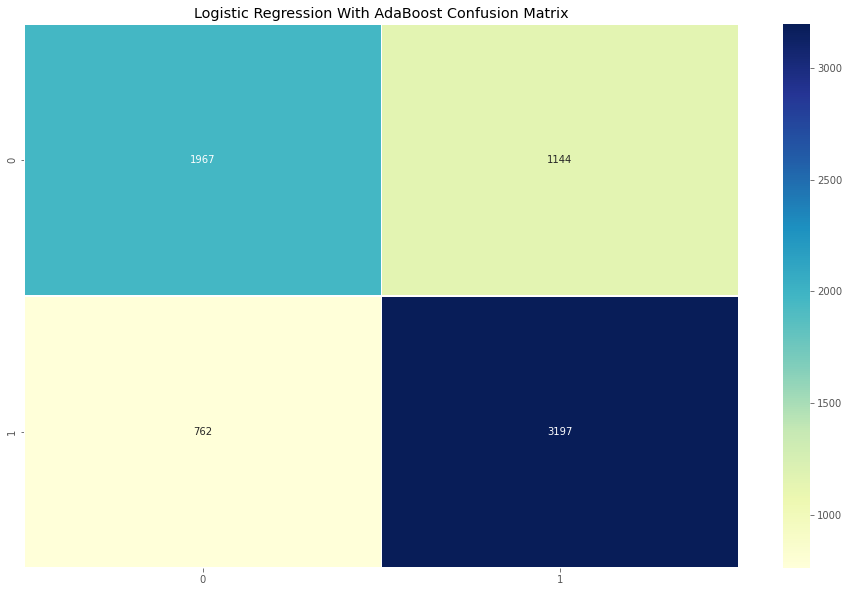

In [112]:
adam = confusion_matrix(y_test, y_predict_ada_clf)
plt.figure(figsize=(16,10))
plt.title('Logistic Regression With AdaBoost Confusion Matrix')
sns.heatmap(adam, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu')

### Voting Classifier CM

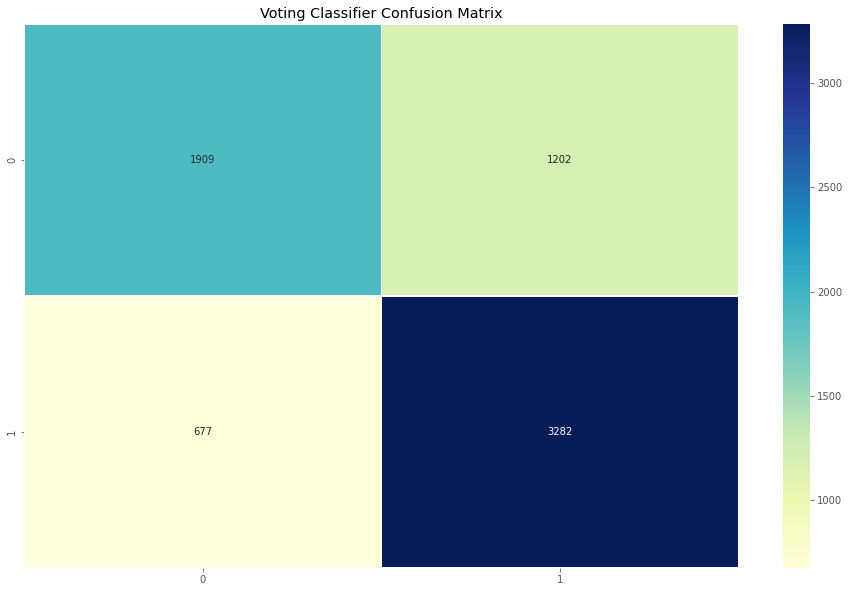

In [113]:
votingm = confusion_matrix(y_test, y_predict_voting_clf)
plt.figure(figsize=(16,10))
plt.title('Voting Classifier Confusion Matrix')
sns.heatmap(votingm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu')

In [114]:
pickle.dump(voting_clf,open('voting_clf_fpkk.pkl','wb'))

# Kesimpulan - Rev & Damas

Dari Model yang telah dikembangkan, didapatkan model yang paling optimal adalah **Voting Classifier** yang mana memiliki akurasi tinggi untuk menentukan pasien apakah menderita hipertensi